# 종합실습2 이변량분석(y-숫자) : car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## 1.환경준비

### (1) 라이브러리 로딩

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

In [8]:
def eda(df, feature, target) :
    temp = df.loc[df[feature].notnull()]
    sns.barplot(x = feature, y = target, data = temp)
    plt.grid()
    plt.show()

    an_list = []
    for i in range(temp[feature].nunique()) :
        an_list.append(df.loc[temp[feature] == i, target])

    if len(an_list) == 2:
    # t-test
        t_stat, p_value = spst.ttest_ind(an_list[0], an_list[1])
        print(f"T-test 결과: t-statistic = {t_stat}, p-value = {p_value}")

    elif len(an_list) > 2:
    # ANOVA
        f_stat, p_value = spst.f_oneway(*an_list)
        print(f"ANOVA 결과: F-statistic = {f_stat}, p-value = {p_value}")

    else:
        print("비교할 그룹이 부족합니다.")

### (2) 데이터 로딩

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [11]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [12]:
target = 'Sales'

## 1.숫자형 X --> Y

* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

### (1) Advertising -> Sales

1) 시각화 : scatter(regplot), jointplot

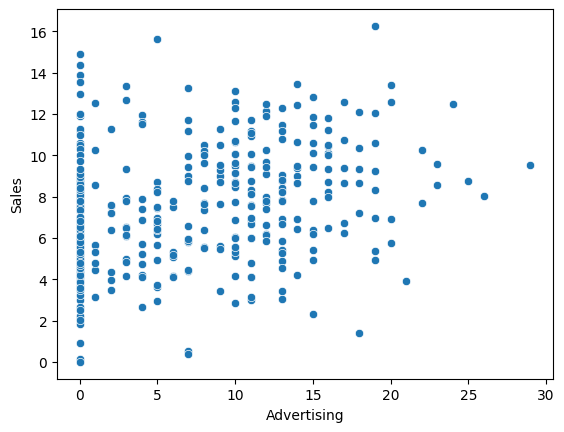

In [17]:
var = 'Advertising'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

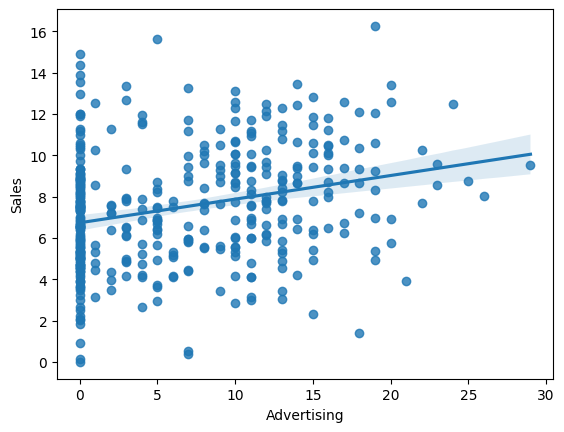

In [18]:
sns.regplot(x=var, y = target, data = data)
plt.show()

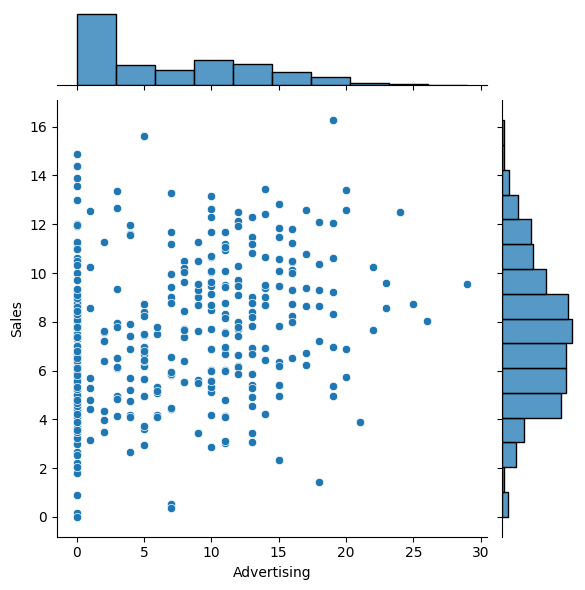

In [19]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [21]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.269506781376902, p-value : 4.3776771103027514e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 광고비와 판매량은 관련이 있다. 그러나 크지 않다.

### (2) Population -> Sales

1) 시각화 : scatter(regplot), jointplot

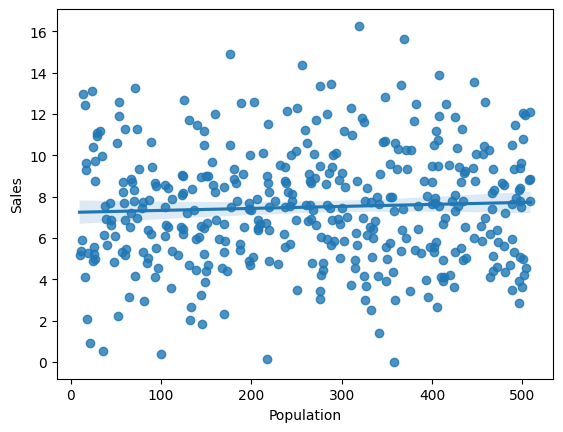

In [26]:
sns.regplot(x='Population', y = 'Sales', data = data)
plt.show()

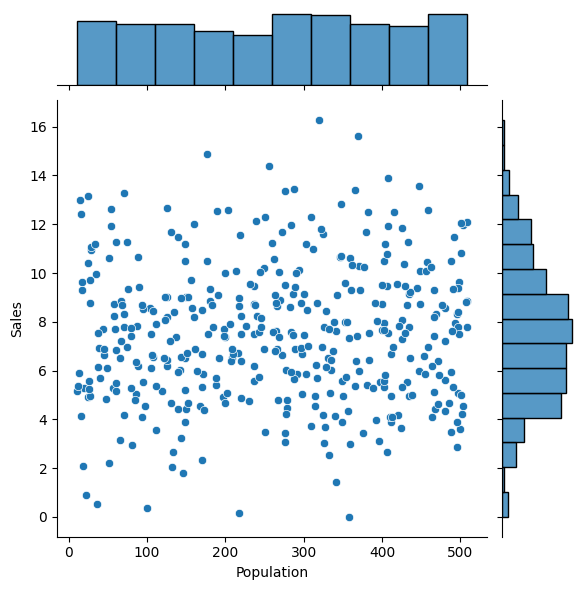

In [27]:
sns.jointplot(x='Population', y = 'Sales', data = data)
plt.show()

2) 수치화 : 상관분석

In [29]:
result = spst.pearsonr(data['Population'], data['Sales'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.0504709844720392, p-value : 0.31398160931904856


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [31]:
# P- Value 값을 보면 유의수준 0.05보다 한참 큰 0.3이다, 즉 
# 인구수와 판매량 두 변수간 유의미한 상관관계가 존재하지 않는다(귀무가설 채택 )

### (3) Price -> Sales

1) 시각화 : scatter(regplot), jointplot

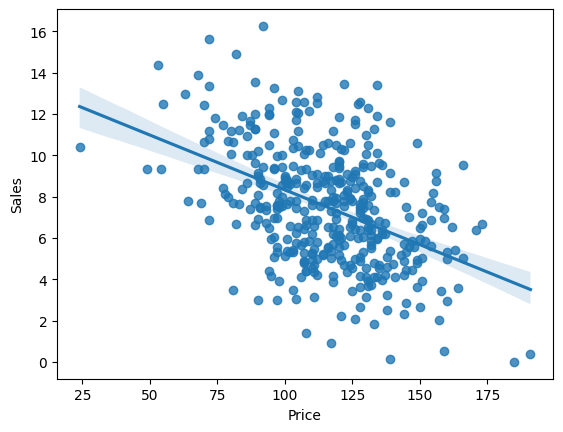

In [34]:
sns.regplot(x='Price', y = 'Sales', data = data)
plt.show()

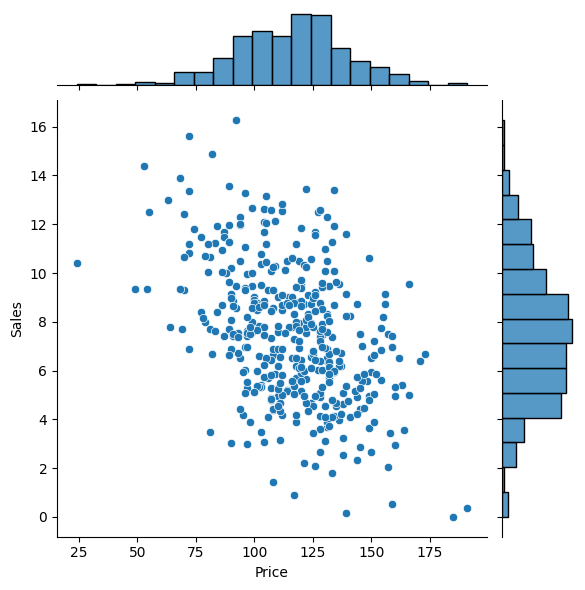

In [35]:
sns.jointplot(x='Price', y = 'Sales', data = data)
plt.show()

2) 수치화 : 상관분석

In [37]:
result = spst.pearsonr(data['Price'], data['Sales'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.4449507278465726, p-value : 7.618187011913169e-21


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [39]:
# P-value 값을 보면 유의수준 0.05보다 작기에 귀무가설을 기각
#즉, 가격과 판매량간에는 음의 (약한?) 상관관계가 존재한다 


### (4) Age -> Sales

1) 시각화 : scatter(regplot), jointplot

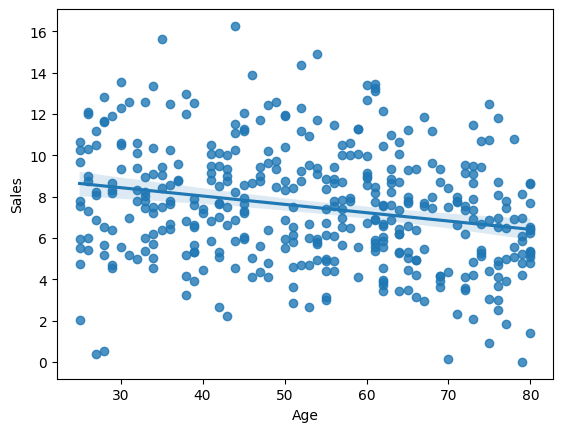

In [42]:
sns.regplot(x='Age', y = 'Sales', data = data)
plt.show()

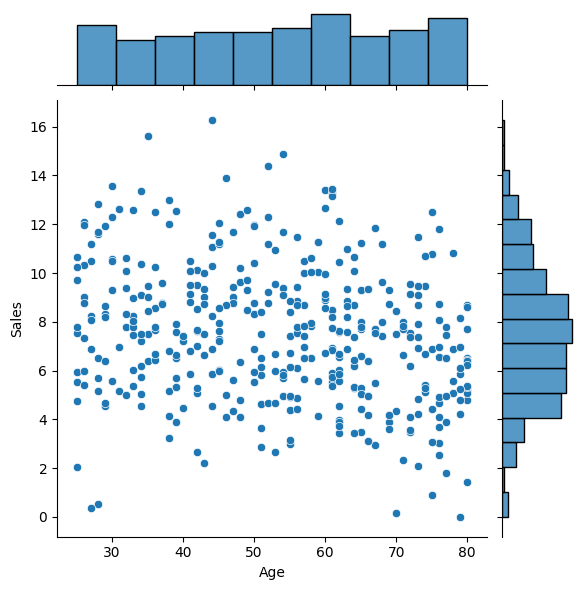

In [43]:
sns.jointplot(x='Age', y = 'Sales', data = data)
plt.show()

2) 수치화 : 상관분석

In [45]:
result = spst.pearsonr(data['Age'], data['Sales'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.2318154396045765, p-value : 2.7889498393714038e-06


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [47]:
# 연령대와 판매량 사이엔 음의 상관관계가 존재한다 (대립가설 채택)

### (5) CompPrice -> Sales

1) 시각화 : scatter(regplot), jointplot

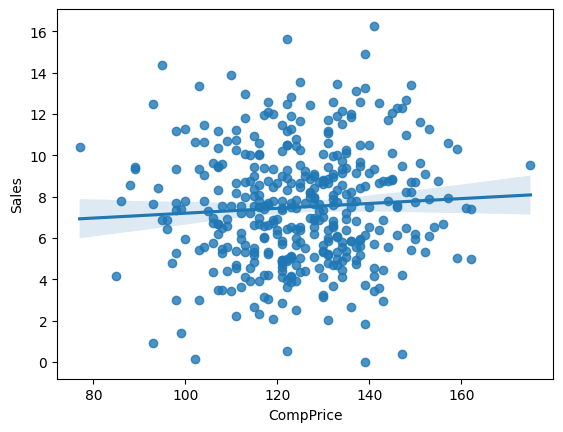

In [50]:
sns.regplot(x='CompPrice', y = 'Sales', data = data)
plt.show()

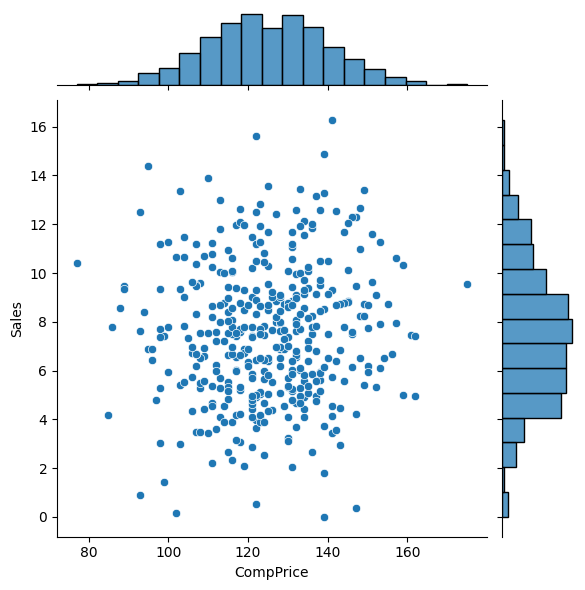

In [51]:
sns.jointplot(x='CompPrice', y = 'Sales', data = data)
plt.show()

2) 수치화 : 상관분석

In [53]:
result = spst.pearsonr(data['CompPrice'], data['Sales'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.06407872955062152, p-value : 0.2009398289418404


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [55]:
# p-value 가 유의수준을 벗어남 >> 귀무가설채택
# 경쟁사의 가격과 매출액은 상관관계가 없다. 

4) 추가 , 경쟁사 가격이랑 매출에 영향을 정말 주지 않을까? 새로운 columns을 생성해서 분석해보자
   - priceDiff : 경쟁사 가격 - 우리제품의 가격 


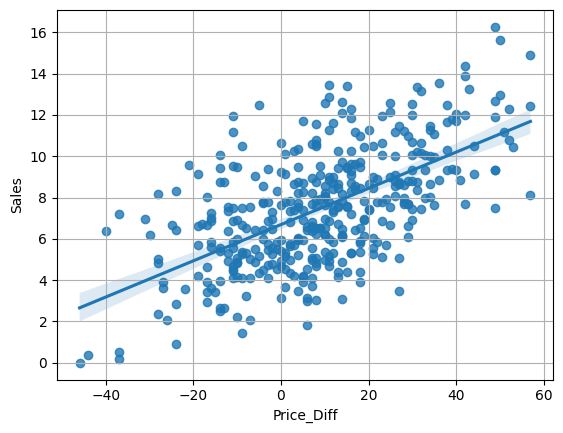

상관계수 : 0.5979217124533921, p-value : 3.877120641788767e-40


In [92]:
data['Price_Diff'] = data['CompPrice'] - data['Price'] # 우리가 얼마나 싼거야? 가격경쟁력이 있는겨?

sns.regplot(x='Price_Diff', y = 'Sales', data = data)
plt.grid()
plt.show()

result = spst.pearsonr(data['Price_Diff'], data['Sales'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')


# 경쟁사 가격차이가 매출에 강한 영향 (상관계수 >0.5) 을 줌

### (6) Income -> Sales

1) 시각화 : scatter(regplot), jointplot

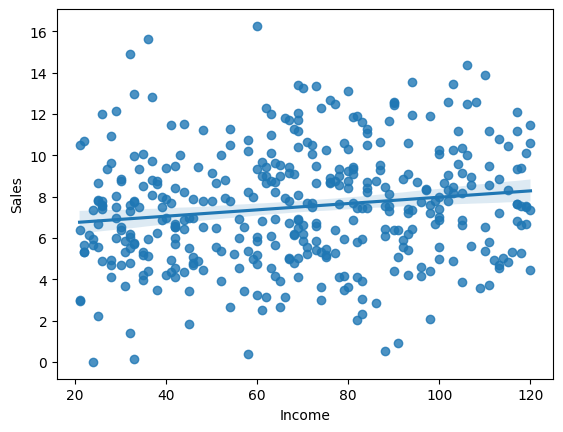

In [60]:
sns.regplot(x='Income', y = 'Sales', data = data)
plt.show()

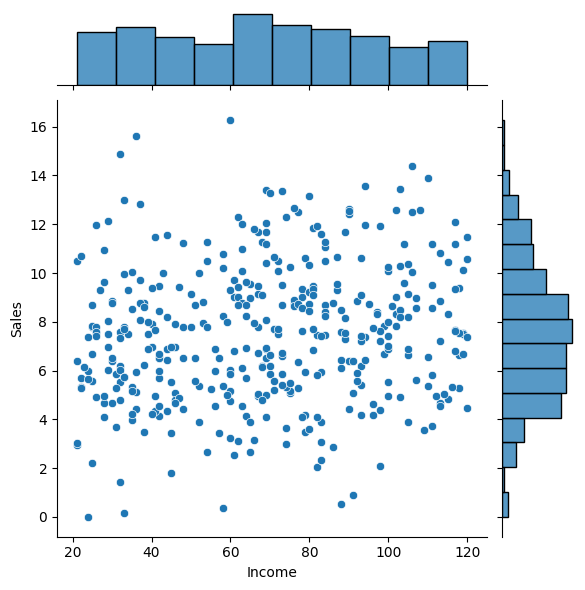

In [61]:
sns.jointplot(x='Income', y = 'Sales', data = data)
plt.show()

2) 수치화 : 상관분석

In [63]:
result = spst.pearsonr(data['Income'], data['Sales'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.15195097946754424, p-value : 0.0023096704539517904


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [65]:
# 귀무가설을 기각, P-valye < 0.05
# 수익과 판매량간에는 양의 상관관계가 존재(약함)

## 2.범주형 X --> Y

* 모든 범주형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

### (1) Urban -> Sales

1) 시각화 : 평균비교 barplot

In [70]:
def eda(df, feature, target) :
    temp = df.loc[df[feature].notnull()]
    sns.barplot(x = feature, y = target, data = temp)
    plt.grid()
    plt.show()

    an_list = []
    for i in range(temp[feature].nunique()) :
        an_list.append(df.loc[temp[feature] == i, target])

    if len(an_list) == 2:
        # t-test
        t_stat, p_value = spst.ttest_ind(an_list[0], an_list[1])
        print(f"T-test 결과: t-statistic = {t_stat}, p-value = {p_value}")

    elif len(an_list) > 2:
        # ANOVA
        f_stat, p_value = spst.f_oneway(*an_list)
        print(f"ANOVA 결과: F-statistic = {f_stat}, p-value = {p_value}")

    else:
        print("비교할 그룹이 부족합니다.")

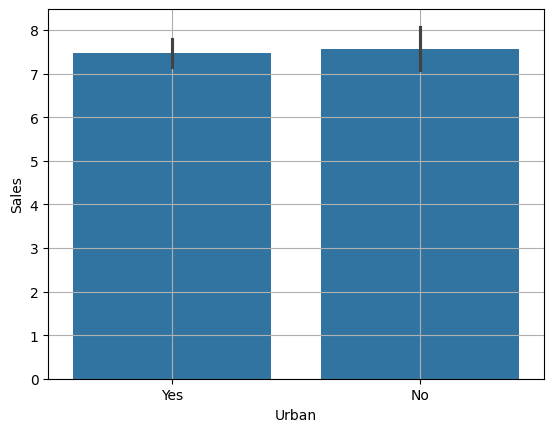

T-test 결과: t-statistic = nan, p-value = nan


In [72]:
eda(df=data ,feature = 'Urban', target='Sales' )

2) 수치화 : t-test, anova

In [74]:
A = data.loc[data['Urban']=='Yes','Sales']
B = data.loc[data['Urban']=='No','Sales']
spst.ttest_ind(A,B)

TtestResult(statistic=-0.30765346670661126, pvalue=0.7585069603942775, df=398.0)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (2) ShelveLoc-> Sales

1) 시각화 : 평균비교 barplot

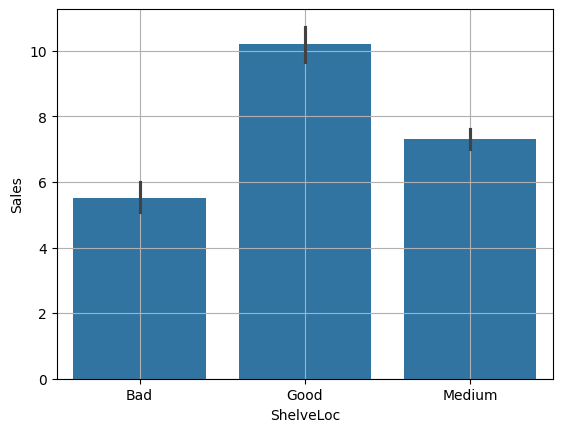

In [76]:
sns.barplot(x='ShelveLoc',y='Sales',data=data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [78]:
bad = data.loc[data['ShelveLoc']=='Bad','Sales']
medium = data.loc[data['ShelveLoc']=='Medium','Sales']
good = data.loc[data['ShelveLoc']=='Good','Sales']
spst.f_oneway(bad,medium,good)

F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (3) US-> Sales

1) 시각화 : 평균비교 barplot

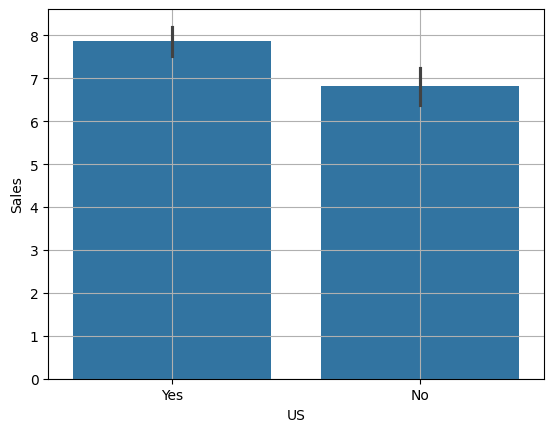

In [80]:
sns.barplot(x='US',y='Sales',data=data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [82]:
A = data.loc[data['US']=='Yes','Sales']
B = data.loc[data['US']=='No','Sales']
spst.ttest_ind(A,B)

TtestResult(statistic=3.589738747802499, pvalue=0.00037233958701471517, df=398.0)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [ ]:
# 미국에 매장을 둔것과 안둔것에 따른 판매량에는 차이가 있다

## 3.관계 정리하기

① 강한관계

In [ ]:
# 숫자 > 숫자 간 상관분석시
#-1, 1에 가까울 수록 강한 상관관계를 나타냄.

# 숫자 >범주 간 관계는 t-test , anova 집단간 평균,분산 차이를 분석할 수 있음 
# F-value는 0~ inf 사이 값을 가지며 inf 에 가까울수록 집단간 차이가 큼

# Advertising , Price , ttest , f_oneway 를  

② 중간관계

In [ ]:
# 숫자 > 숫자 간 상관분석시
#- 0에 가까울 수록 약한 상관관계를 나타냄.

③ 관계없음

In [ ]:
# P -value > 0.05 이상 (집단간 차이가 없다:귀무가설 을 채택 )

In [ ]:
def eda(df, feature, target) :
    temp = df.loc[df[feature].notnull()]
    sns.barplot(x = feature, y = target, data = temp)
    plt.grid()
    plt.show()

    an_list = []
    for i in range(temp[feature].nunique()) :
        an_list.append(df.loc[temp[feature] == i, target])

    if len(an_list) == 2:
    # t-test
        t_stat, p_value = spst.ttest_ind(an_list[0], an_list[1])
        print(f"T-test 결과: t-statistic = {t_stat}, p-value = {p_value}")

    elif len(an_list) > 2:
    # ANOVA
        f_stat, p_value = spst.f_oneway(*an_list)
        print(f"ANOVA 결과: F-statistic = {f_stat}, p-value = {p_value}")

else:
print("비교할 그룹이 부족합니다.")